# BANK CHURN PREDICTION

The dataset is about predicting customer churn in the banking sector. It contains various features like credit score, age, tenure, balance, number of products, credit card status, active membership status, estimated salary, and churn status. Predicting customer churn is critical for businesses, especially in the banking sector. Retaining existing customers is often more cost-effective than acquiring new ones. By predicting which customers are likely to churn, banks can proactively address their concerns and improve customer retention1.<br>
Mem__no__Products= NumOfProducts * IsActiveMember.<br>
Cred_Bal_Sal= (Credit Score * Balance) / EstimatedSalary.

# Importing Data and Modules

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv(r"C:\Users\chara\Downloads\archive\Dataset.csv")

In [3]:
data.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0


In [4]:
data.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

In [5]:
#Droping Unwanted columns
discarding_columns = ['Surname','Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4']

In [6]:
data.drop(discarding_columns,axis=1,inplace=True)

In [7]:
data.shape

(175028, 19)

In [8]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
count,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,1.750280e+05,175028.000000,175028.000000,175028.000000
mean,656.113068,38.171337,5.019968,56676.772103,1.553072,0.751183,0.498754,111863.295024,0.211149,0.566909,0.212046,0.221045,0.436644,0.563356,0.784989,1.444363e+03,2.202494,0.138587,191.346929
std,81.148273,8.969565,2.811155,62982.418525,0.549212,0.432329,0.500000,50815.118428,0.408125,0.495504,0.408758,0.414952,0.495971,0.495971,0.871599,6.097238e+04,92.679435,0.085465,118.745788
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,73225.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.068182,93.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116969.730000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.131579,180.000000
75%,710.000000,42.000000,7.000000,120727.970000,2.000000,1.000000,1.000000,154767.340000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,6.585861e+02,1.000001,0.200000,272.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,8.634204e+06,12863.796200,0.555556,880.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         175028 non-null  float64
 1   Age                 175028 non-null  float64
 2   Tenure              175028 non-null  float64
 3   Balance             175028 non-null  float64
 4   NumOfProducts       175028 non-null  float64
 5   HasCrCard           175028 non-null  int64  
 6   IsActiveMember      175028 non-null  int64  
 7   EstimatedSalary     175028 non-null  float64
 8   Exited              175028 non-null  int64  
 9   France              175028 non-null  int64  
 10  Germany             175028 non-null  int64  
 11  Spain               175028 non-null  int64  
 12  Female              175028 non-null  int64  
 13  Male                175028 non-null  int64  
 14  Mem__no__Products   175028 non-null  float64
 15  Cred_Bal_Sal        175028 non-nul

In [10]:
data.isna().sum()

CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
France                0
Germany               0
Spain                 0
Female                0
Male                  0
Mem__no__Products     0
Cred_Bal_Sal          0
Bal_sal               0
Tenure_Age            0
Age_Tenure_product    0
dtype: int64

No missing values present in the data

## Exploratory Data Analysis

### Univariate Analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1000x1800 with 0 Axes>

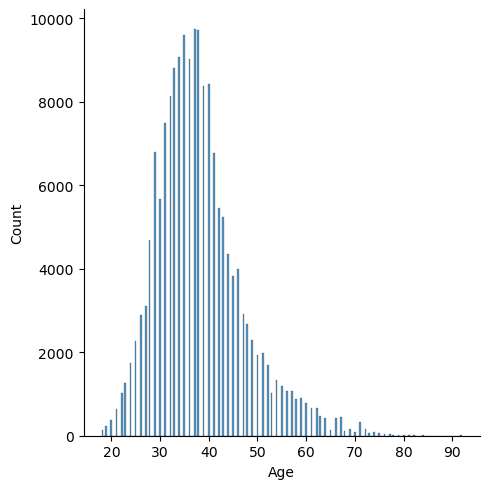

In [14]:
#Age Distribution
plt.figure(figsize=(10,18))
sns.displot(data=data, x='Age')
plt.show()

<Figure size 1000x1800 with 0 Axes>

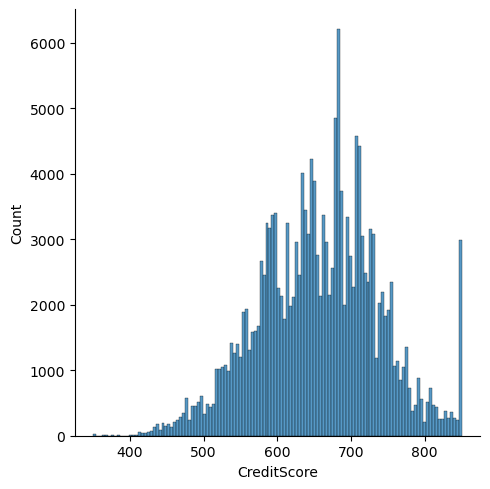

In [15]:
#CreditScore Distribution
plt.figure(figsize=(10,18))
sns.displot(data=data, x='CreditScore')
plt.show()

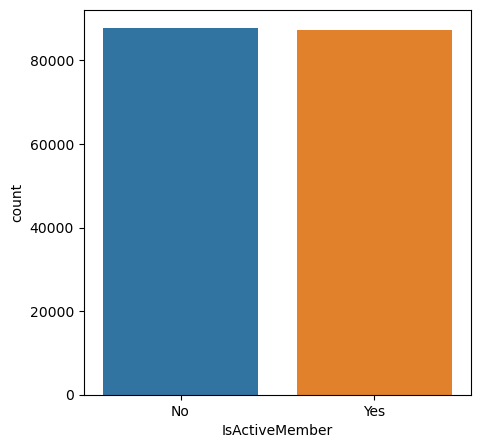

In [16]:
#isActiveMember Distribution
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='IsActiveMember')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.show()

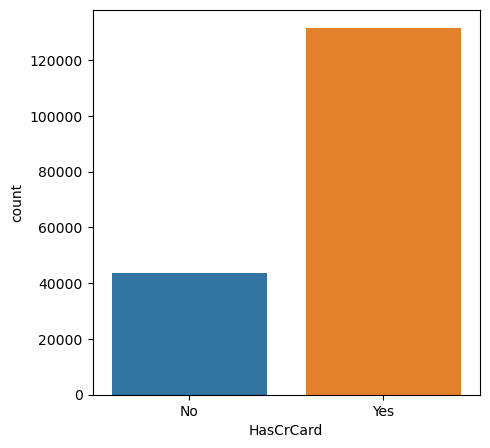

In [17]:
#HasCrCard Distribution
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='HasCrCard')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.show()

In [18]:
#country wise instances in the data
countries = {'France':sum(data['France']),'Germany':sum(data['Germany']),'Spain':sum(data['Spain'])}

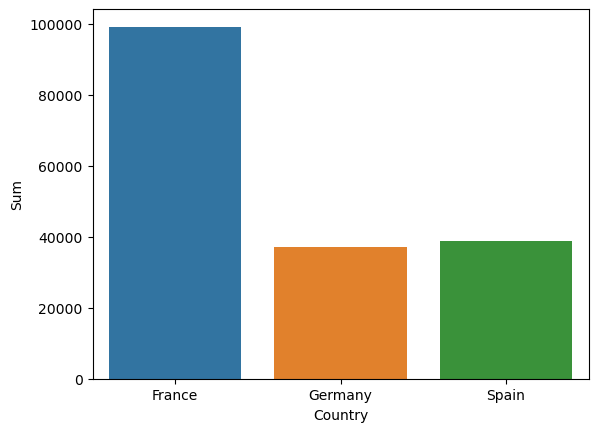

In [19]:
sns.barplot(x='Country', y='Sum', data=pd.DataFrame(list(countries.items()), columns=['Country', 'Sum']))
plt.show()

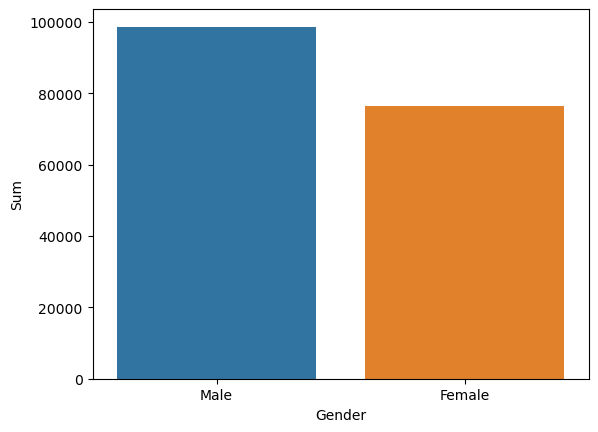

In [20]:
#Gender distribution in the data
gender = {'Male':sum(data['Male']),'Female':sum(data['Female'])}

sns.barplot(x='Gender', y='Sum', data=pd.DataFrame(list(gender.items()), columns=['Gender', 'Sum']))
plt.show()

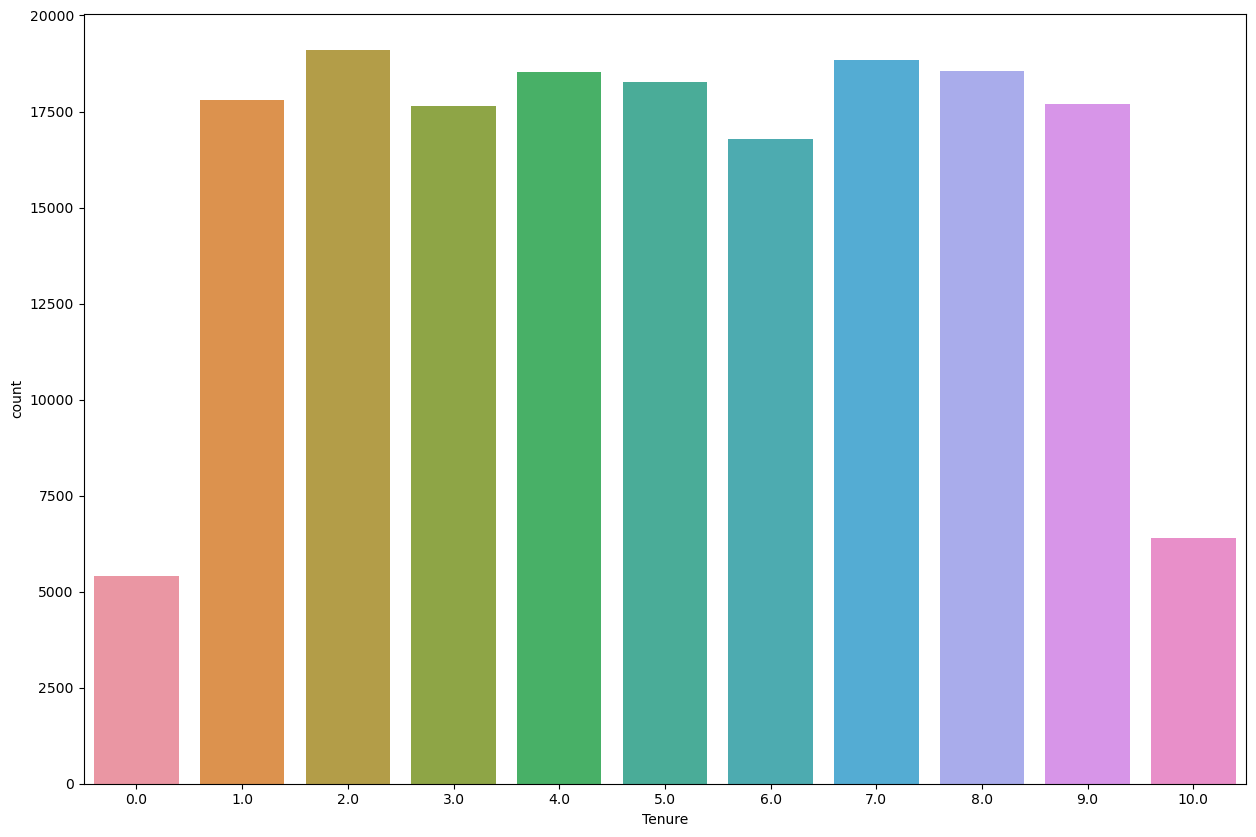

In [21]:
#Tenure Distribution
plt.figure(figsize=(15,10))
sns.countplot(data=data, x='Tenure')
plt.show()

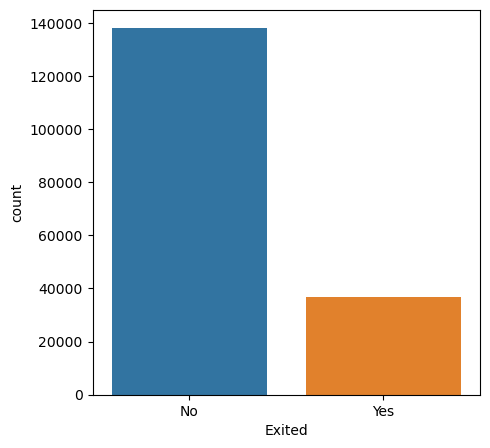

In [22]:
#isActiveMember Distribution
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='Exited')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.show()

The Exited(target feature) is unbalanced

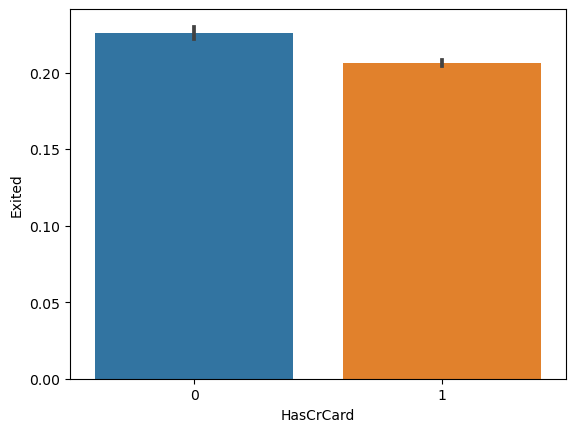

In [23]:
#Credit card vs Exited
sns.barplot(x='HasCrCard', y='Exited', data=data)
plt.show()

### Bivariate Analysis

In [25]:
melted_data = pd.melt(data, id_vars=['Exited'], value_vars=['France', 'Germany', 'Spain'])

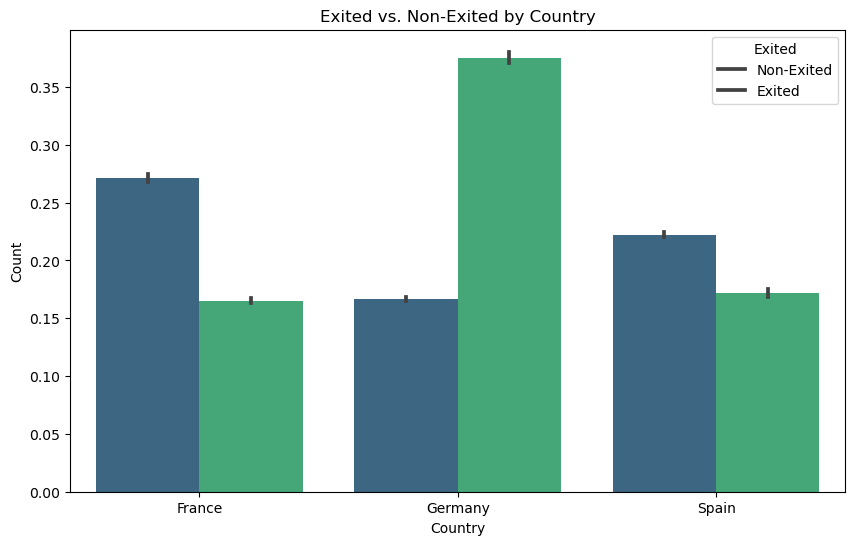

In [26]:
#Plot betwwen Exited vs Non-Exited by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='Exited', hue='value', data=melted_data, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Exited vs. Non-Exited by Country')
plt.legend(title='Exited', labels=['Non-Exited', 'Exited'])
plt.xticks(rotation=0)
plt.show()

In [27]:
male_exited = data[(data['Male']==1) & (data['Exited']==1)]
female_exited = data[(data['Female']==1) & (data['Exited']==1)]

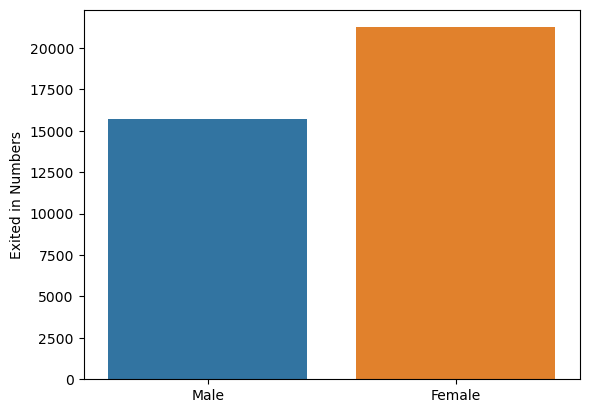

In [28]:
#Gender vs Exited in numbers
sns.barplot(x=['Male','Female'],y=[len(male_exited),len(female_exited)])
plt.ylabel('Exited in Numbers')
plt.show()

Is being an active member to products effecting Exiting from the bank

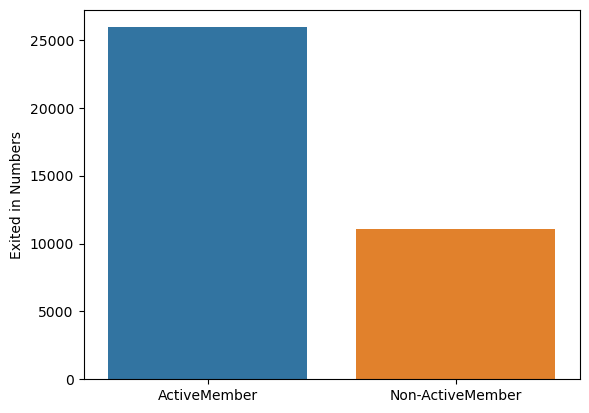

In [29]:
#Active member and Non-Active member vs Exited
active_member_exited = data[(data['IsActiveMember']==0) & (data['Exited']==1)]
non_active_exited = data[(data['IsActiveMember']==1) & (data['Exited']==1)]
sns.barplot(x=['ActiveMember','Non-ActiveMember'],y=[len(active_member_exited),len(non_active_exited)])
plt.ylabel('Exited in Numbers')
plt.show()

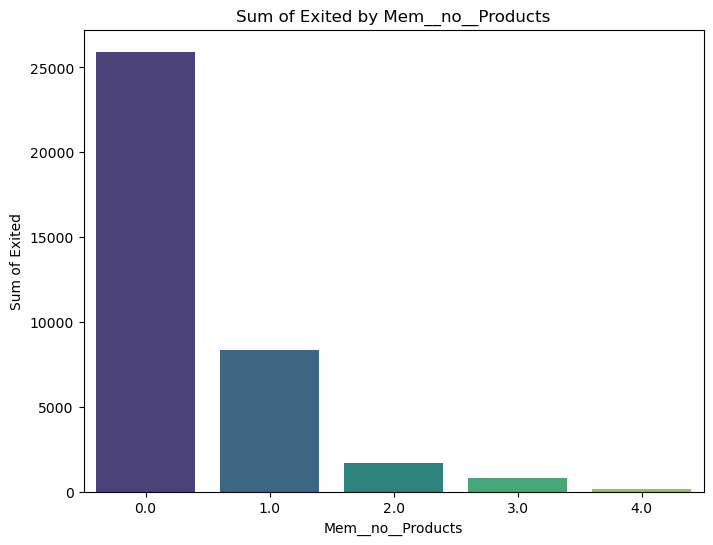

In [30]:
#Plot between Sum of Exited by Mem_no_Products.
grouped_data = data.groupby('Mem__no__Products')['Exited'].sum().reset_index()

grouped_data
plt.figure(figsize=(8, 6))
sns.barplot(x='Mem__no__Products', y='Exited', data=grouped_data, palette='viridis')
plt.xlabel('Mem__no__Products')
plt.ylabel('Sum of Exited')
plt.title('Sum of Exited by Mem__no__Products')
plt.show()